<a href="https://colab.research.google.com/github/A-S-8/CatandDogDataset/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload() #json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d chetankv/dogs-cats-images


 98% 425M/435M [00:06<00:00, 48.0MB/s]
100% 435M/435M [00:06<00:00, 75.4MB/s]


In [5]:
!unzip -q dogs-cats-images.zip


In [6]:

import os

file_list = os.listdir()
print(file_list)


['.config', 'dog vs cat', 'dataset', 'dogs-cats-images.zip', 'sample_data']


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

input_size = (150, 150)
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/content/dog vs cat/dataset/training_set',
    target_size=input_size,
    batch_size=batch_size,
    class_mode='binary'
)


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10
)


model.save('cats_dogs_cnn_fnn_model.h5')


Found 8000 images belonging to 2 classes.
Epoch 1/10
250/250 [==============================] - 68s 218ms/step - loss: 0.6901 - accuracy: 0.5270
Epoch 2/10
250/250 [==============================] - 55s 220ms/step - loss: 0.6831 - accuracy: 0.5443
Epoch 3/10
250/250 [==============================] - 56s 224ms/step - loss: 0.6733 - accuracy: 0.5769
Epoch 4/10
250/250 [==============================] - 56s 225ms/step - loss: 0.6491 - accuracy: 0.6274
Epoch 5/10
250/250 [==============================] - 54s 218ms/step - loss: 0.6380 - accuracy: 0.6385
Epoch 6/10
250/250 [==============================] - 53s 214ms/step - loss: 0.6189 - accuracy: 0.6568
Epoch 7/10
250/250 [==============================] - 53s 214ms/step - loss: 0.6075 - accuracy: 0.6709
Epoch 8/10
250/250 [==============================] - 53s 213ms/step - loss: 0.5919 - accuracy: 0.6866
Epoch 9/10
250/250 [==============================] - 53s 213ms/step - loss: 0.5887 - accuracy: 0.6881
Epoch 10/10
250/250 [==========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

input_size = (150, 150)
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    '/content/dog vs cat/dataset/test_set',
    target_size=input_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import load_model

model = load_model('cats_dogs_cnn_fnn_model.h5')
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')



63/63 [==============================] - 4s 54ms/step - loss: 0.5130 - accuracy: 0.7505
Test accuracy: 75.05%


In [13]:
import matplotlib.pyplot as plt
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20
)


Epoch 1/20
250/250 [==============================] - 54s 215ms/step - loss: 0.5335 - accuracy: 0.7315
Epoch 2/20
250/250 [==============================] - 55s 219ms/step - loss: 0.5234 - accuracy: 0.7439
Epoch 3/20
250/250 [==============================] - 53s 213ms/step - loss: 0.5058 - accuracy: 0.7517
Epoch 4/20
250/250 [==============================] - 54s 216ms/step - loss: 0.4960 - accuracy: 0.7598
Epoch 5/20
250/250 [==============================] - 53s 214ms/step - loss: 0.4880 - accuracy: 0.7642
Epoch 6/20
250/250 [==============================] - 54s 215ms/step - loss: 0.4661 - accuracy: 0.7824
Epoch 7/20
250/250 [==============================] - 54s 215ms/step - loss: 0.4580 - accuracy: 0.7845
Epoch 8/20
250/250 [==============================] - 53s 213ms/step - loss: 0.4413 - accuracy: 0.7926
Epoch 9/20
250/250 [==============================] - 55s 218ms/step - loss: 0.4307 - accuracy: 0.8020
Epoch 10/20
250/250 [==============================] - 54s 216ms/step - l

KeyError: ignored

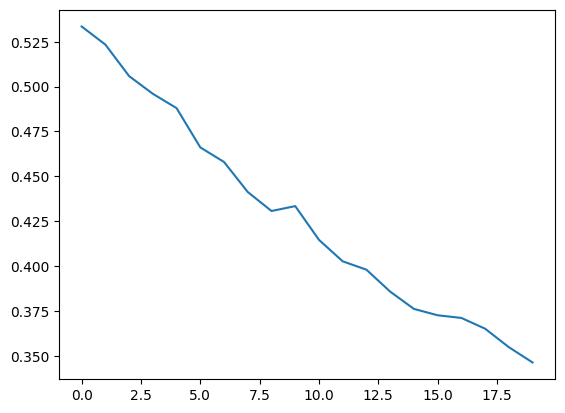

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


KeyError: ignored

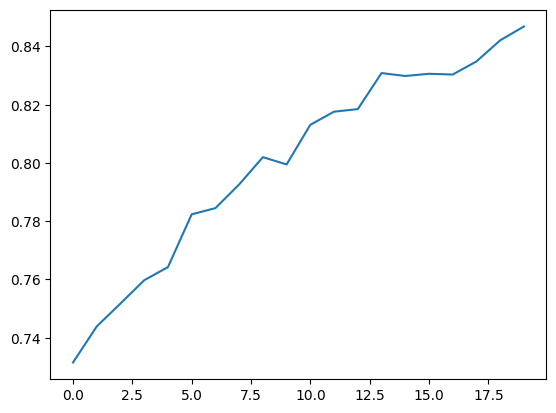

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('training_loss.png')


In [ ]:

from tensorflow.keras.models import load_model

model = load_model('cats_dogs_cnn_fnn_model.h5')
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')